## H1:numpy创建数组，数组形状修改结果截图

## numpy包的简单使用

#### np.arange()函数用法
* 一个参数时，参数值为终点，起点取默认值0，步长取默认值1。
* 两个参数时，第一个参数为起点，第二个参数为终点，步长取默认值1。
* 三个参数时，第一个参数为起点，第二个参数为终点，第三个参数为步长。其中步长支持小数。

In [7]:
import numpy as np 
x1 = np.arange(5) 
x2 = np.arange(1,5)
x3 = np.arange(1,5,2)
print (x1,'\n',x2,'\n',x3)

[0 1 2 3 4] 
 [1 2 3 4] 
 [1 3]


#### reashpe()函数用法
* 改变数组的形状，并且原始数据不发生变化。但是，reshape()函数中的参数需要满足乘积等于数组中数据总数.
* 通过reshape生成的新数组和原始数组公用一个内存，也就是说，假如更改一个数组的元素，另一个数组也将发生改变
* reashpe(m,n) 将一维的含m*n个元素的数组拆分为m个数组，每个数组含有n个元素
* https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [28]:
import numpy
x=numpy.arange(20) #创建一个包含个 30 数字的数组 x
print('原始数组: ')
print(x) #打印数组 x
print('原始数组的维度是： {}'.format(x.ndim)) #输出数组的维度
print('原始数组的形状是： {}'.format(x.shape)) #输出数组的形状
y=x.reshape(2,2,5) #改变数组的形状
print('修改后的数组:')
print(y)
print('修改后的数组的维度是： {}'.format(y.ndim))
print('修改后的数组的形状是： {}'.format(y.shape))

原始数组: 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
原始数组的维度是： 1
原始数组的形状是： (20,)
修改后的数组:
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]]
修改后的数组的维度是： 3
修改后的数组的形状是： (2, 2, 5)


# 线性回归LinearRegression分析糖尿病病人数据

#### 回归模型(线性回归算法、逻辑回归算法)步骤
1. 导入模型。调用逻辑回归LinearRegression()函数。   
2. fit()训练。调用fit(x,y)的方法来训练模型，其中x为数据的属性，y为所属类型    
3. predict()预测。利用训练得到的模型对数据集进行预测，返回预测结果。


## H2 输出糖尿病数据集所有变量值及其数组形状

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
#导入数据集
from sklearn.metrics import mean_squared_error
diabetes = datasets.load_diabetes() #载入数据集

In [30]:
#输出显示整个diabetes数据
print(diabetes)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [31]:
#输出显示提示文档
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [32]:
print('数据集的所有变量值：')
print(diabetes.data) #输出数据集
print('数据集的所有变量值的数组形状为：{}'.format(diabetes.data.shape))

数据集的所有变量值：
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
数据集的所有变量值的数组形状为：(442, 10)


## H3 输出糖尿病数据所有样本真实标签及其数组形状

In [33]:
print('样本真实标签：')
print(diabetes.target) #输出真实标签
print('样本真实标签的数组形状为：{}'.format(diabetes.target.shape))

样本真实标签：
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122

In [34]:
#输出显示10个变量及其数组值
for i in range(0,10):
    m = i
    i = diabetes.data[:, i]#输出第i列数据
    print("第",m,"个特征变量及其数组值为（",i.shape,"）个","\n",i,"\n")
#输出显示1个类别变量
print("1个类别变量","\n")
print(diabetes.target)

第 0 个特征变量及其数组值为（ (442,) ）个 
 [ 0.03807591 -0.00188202  0.08529891 -0.08906294  0.00538306 -0.09269548
 -0.04547248  0.06350368  0.04170844 -0.07090025 -0.09632802  0.02717829
  0.01628068  0.00538306  0.04534098 -0.05273755 -0.00551455  0.07076875
 -0.0382074  -0.02730979 -0.04910502 -0.0854304  -0.0854304   0.04534098
 -0.06363517 -0.06726771 -0.10722563 -0.02367725  0.05260606  0.06713621
 -0.06000263 -0.02367725  0.03444337  0.03081083  0.01628068  0.04897352
  0.01264814 -0.00914709 -0.00188202 -0.00188202  0.00538306 -0.09996055
 -0.06000263  0.01991321  0.04534098  0.02717829 -0.05637009 -0.07816532
  0.06713621 -0.04183994  0.03444337  0.05987114 -0.05273755 -0.00914709
 -0.04910502 -0.04183994 -0.04183994 -0.02730979  0.04170844  0.06350368
 -0.07090025 -0.04183994 -0.02730979 -0.03457486  0.06713621 -0.04547248
 -0.00914709  0.04170844  0.03807591  0.01628068 -0.00188202 -0.00188202
  0.06350368  0.01264814  0.01264814 -0.00914709 -0.03094232 -0.09632802
  0.00538306 -0.103593

## H4 输出测试数据散点图（学号尾号为基数散点图为红色方形，学号尾号为偶数散点图为蓝色圆形）


(442,)


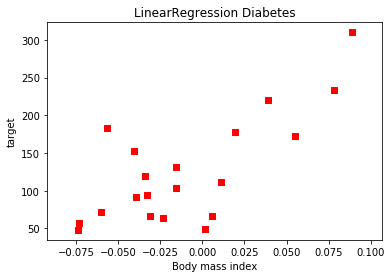

In [35]:
diabetes_X = diabetes.data[:, 2]  #第三列 Body mass index
print(diabetes_X.shape)
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
#绘制测试集的散点图
plt.title(u'LinearRegression Diabetes')   #标题
plt.xlabel(u'Body mass index')                 #x轴坐标
plt.ylabel(u'target')         #y轴坐标
plt.scatter(diabetes_X_test, diabetes_y_test, color='red', marker='s')   #画散点图
plt.show()


## H5 diabetes_X_train=np.array(diabetes_X_train).reshape(-1,1)句的意义？

In [37]:
diabetes_X_train = diabetes_X[:-20]
print("原数组形状","\n",diabetes_X_train)
print(diabetes_X_train.shape)
print("\n")
print(np.array(diabetes_X_train).reshape(-1,1).shape)
print("新数组形状","\n",np.array(diabetes_X_train).reshape(-1,1))

原数组形状 
 [ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469 -0.04069594
 -0.04716281 -0.00189471  0.06169621  0.03906215 -0.08380842  0.01750591
 -0.02884001 -0.00189471 -0.02560657 -0.01806189  0.04229559  0.01211685
 -0.0105172  -0.01806189 -0.05686312 -0.02237314 -0.00405033  0.06061839
  0.03582872 -0.01267283 -0.07734155  0.05954058 -0.02129532 -0.00620595
  0.04445121 -0.06548562  0.12528712 -0.05039625 -0.06332999 -0.03099563
  0.02289497  0.01103904  0.07139652  0.01427248 -0.00836158 -0.06764124
 -0.0105172  -0.02345095  0.06816308 -0.03530688 -0.01159501 -0.0730303
 -0.04177375  0.01427248 -0.00728377  0.0164281  -0.00943939 -0.01590626
  0.0250506  -0.04931844  0.04121778 -0.06332999 -0.06440781 -0.02560657
 -0.00405033  0.00457217 -0.00728377 -0.0374625  -0.02560657 -0.02452876
 -0.01806189 -0.01482845 -0.02991782 -0.046085   -0.06979687  0.03367309
 -0.00405033 -0.02021751  0.00241654 -0.03099563  0.02828403 -0.03638469
 -0.05794093 -0.0374625   0.01211685 -0.0223

#### diabetes_X_train=np.array(diabetes_X_train).reshape(-1,1)将训练集的数据转化为列数为1的新数组，作为x.fit()函数的第一个输入矩阵参数

## H6线性回归回归系数计算


In [39]:
#回归训练及预测
diabetes_X_train=np.array(diabetes_X_train).reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
print(regr)
#系数 残差平法和 方差得分
diabetes_X_test=np.array(diabetes_X_test).reshape(-1,1)
print ('Coefficients :\n', regr.coef_)
print ("Residual sum of square: %.2f" %np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
print ("variance score: %.2f" % regr.score(diabetes_X_test, diabetes_y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Coefficients :
 [938.23786125]
Residual sum of square: 2548.07
variance score: 0.47


## H7 线性回归的回归结果折线图及散点图展示

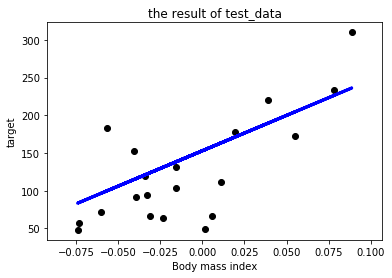

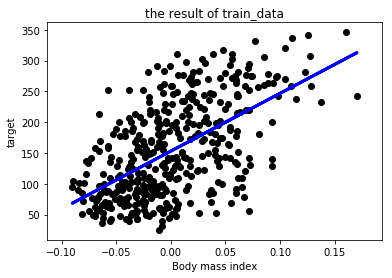

In [40]:
# Plot outputs
diabetes_y_pred1 = regr.predict(diabetes_X_test)
#绘制测试集的散点图
plt.title('the result of test_data')   #标题
plt.xlabel(u'Body mass index')                 #x轴坐标
plt.ylabel(u'target')         #y轴坐标
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred1, color='blue', linewidth=3) #画折线图
plt.show()
#绘制训练集集的散点图
diabetes_y_pred2 = regr.predict(diabetes_X_train)
plt.title('the result of train_data')   #标题
plt.xlabel(u'Body mass index')                 #x轴坐标
plt.ylabel(u'target')         #y轴坐标
plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')
plt.plot(diabetes_X_train, diabetes_y_pred2, color='blue', linewidth=3) #画折线图
plt.show()

In [71]:
print('Mean squared error: %.2f'% mean_squared_error(diabetes_y_test,diabetes_y_pred1))

Mean squared error: 2548.07


## 逻辑回归与线性回归的区别
##### 逻辑回归
* 广义线性回归模型，与线性回归模型都具有𝑦=𝑏0+𝑏1𝑥1+…+𝑏n𝑥n
* 逻辑回归使用将𝑏0+𝑏1𝑥 1+…+𝑏n𝑥n作为间接量，即逻辑回归将𝑏0+𝑏1𝑥1+…+𝑏n𝑥n 映射到[0,1]：属于某一类的概率多大
* 如果目标是进行分类，使用逻辑回归.采用回归模型分析实际问题中，所研究的变量往往不全是区间变量而是顺序变量或属性变量，比如二项分布问题。通过分析年龄、性别、体质指数、平均血压、疾病指数等指标，判断一个人是否换糖尿病，Y=0表示未患病，Y=1表示患病，这里的响应变量是一个两点（0-1）分布变量，它就不能用h函数连续的值来预测因变量Y（只能取0或1）
##### 线性回归
 * 线性回归直接将𝑏0+𝑏1𝑥 1+…+𝑏n𝑥n作为因变量，即𝑦 = 𝑏0+𝑏1𝑥 1+…+𝑏n𝑥n
 * 如前面提到的，使用 BMI （数值）预测糖尿病发展情况（数值），目标是进行回归（预测），使用线性回归

# 逻辑回归LogisticRegression分析鸢尾花数据


## H8逻辑回归回归系数计算

In [42]:
from sklearn.linear_model import LogisticRegression  #导入逻辑回归模型 
clf = LogisticRegression()
print(clf)#显示逻辑回归模型
'''
参数 penalty 表示惩罚项（ L1 、 L2 值可选。 L1 向量中各元素绝对值的和，作用是产生少量的特征，
而其他特征都是 0 ，常用于特征选择； L2 向量中各个元素平方之和再开根号，作用是选择较多的特征，使他们都趋近于 0 。）；  
C 值的目标函数约束条件： s.t.||w||1<C ，默认值是 0 ， C 值越小，则正则化强度越大。
'''

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


'\n参数 penalty 表示惩罚项（ L1 、 L2 值可选。 L1 向量中各元素绝对值的和，作用是产生少量的特征，\n而其他特征都是 0 ，常用于特征选择； L2 向量中各个元素平方之和再开根号，作用是选择较多的特征，使他们都趋近于 0 。）；  \nC 值的目标函数约束条件： s.t.||w||1<C ，默认值是 0 ， C 值越小，则正则化强度越大。\n'

##### LogisticRegression模型参数介绍参见
https://blog.csdn.net/jark_/article/details/78342644

In [43]:
from sklearn.datasets import load_iris   #导入数据集iris
iris = load_iris()  #载入数据集
print(iris.target_names)#显示0，1，2对应的鸢尾花的种类
print(iris.DESCR)#显示相关描述

['setosa' 'versicolor' 'virginica']
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

  

In [44]:
print('数据特征标签：\n',iris.data)   #数据
print('类别标签：\n',iris.target) #对应的标签

数据特征标签：
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

5.843333333333334 
 3.0540000000000003


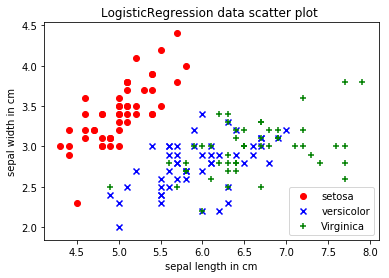

In [54]:
DD = iris.data  
#获取花卉两列数据集  
X = [x[0] for x in DD] # x代表sepal length in cm
Y = [x[1] for x in DD] # y代表sepal width in cm
print(np.array(X).mean(),'\n',np.array(Y).mean())
plt.title('LogisticRegression data scatter plot ') #标题
plt.xlabel('sepal length in cm') #x轴坐标
plt.ylabel('sepal width in cm')  #y轴坐标
plt.scatter(X[:50], Y[:50], color='red', marker='o', label='setosa') #前50个样本,代表第一类 50个0
plt.scatter(X[50:100], Y[50:100], color='blue', marker='x', label='versicolor') #中间50个,代表第二类 50个1
plt.scatter(X[100:], Y[100:],color='green', marker='+', label='Virginica') #后50个样本,代表第三类 50个2
plt.legend(loc=4) #左上角 1右上角 2左上角 3左下角 4右下角
plt.show()

[[-30.61879527  27.54963779]
 [  0.14041199  -3.21392459]
 [  2.60373147  -0.74348327]]
[ 77.73711825   8.02399007 -14.19811218]


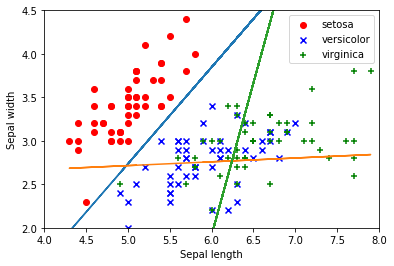

In [79]:
import pandas as pd
data = DD[:,:2]#获取花卉两列数据集
#print (data)
label = iris.target
#初始化逻辑回归模型并进行训练， C=1e5 表示目标函数。
X=pd.DataFrame(data)
X.columns=["Sepal length","Sepal width"] 
Y=pd.DataFrame(label)
Y.columns=["class"] 
Y=Y.loc[:,"class"]
lr = LogisticRegression(C=1e5)  
lr.fit(data,label)
print(lr.coef_)#回归系数
print(lr.intercept_)#b坐标
#print(lr.score(Y,lr.predict(X)))
fig=plt.figure()
a1=lr.coef_[0][0]
b1=lr.coef_[0][1]
c1=lr.intercept_[0]

a2=lr.coef_[1][0]
b2=lr.coef_[1][1]
c2=lr.intercept_[1]

a3=lr.coef_[2][0]
b3=lr.coef_[2][1]
c3=lr.intercept_[2]
x=X.loc[:,"Sepal length"]
y1=-(c1+a1*x)/b1
y2=-(c2+a2*x)/b2
y3=-(c3+a3*x)/b3
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
setosa=plt.scatter(X.loc[:,"Sepal length"][Y==0],X.loc[:,"Sepal width"][Y==0], color='red', marker='o', label='setosa') 
versicolor=plt.scatter(X.loc[:,"Sepal length"][Y==1],X.loc[:,"Sepal width"][Y==1], color='blue', marker='x', label='versicolor') 
virginica=plt.scatter(X.loc[:,"Sepal length"][Y==2], X.loc[:,"Sepal width"][Y==2], color='green', marker='+', label='virginica') 
plt.legend((setosa,versicolor,virginica),  ('setosa','versicolor','virginica'))
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xlim((4, 8))
plt.ylim((2, 4.5))
plt.show()

### 均方误差分析

In [76]:
iris = load_iris() #载入数据集
DD = iris.data
X = [x[0] for x in DD]
Y = [x[1] for x in DD] #获取花卉两列数据集
from sklearn.linear_model import LogisticRegression #导入逻辑回归模型
clf = LogisticRegression()
x=np.array((X,Y)).T
y=iris.target
clf.fit(x,y)
X_test=X[-20:]
Y_test=Y[-20:]
x_test=np.array((X_test,Y_test)).T
y_test=y[-20:]
y_pred=clf.predict(x_test)
from sklearn.metrics import mean_squared_error
print('Mean squared error: %.2f'% mean_squared_error(y_test,y_pred))

Mean squared error: 0.20


# H9逻辑回归回归散点图展示

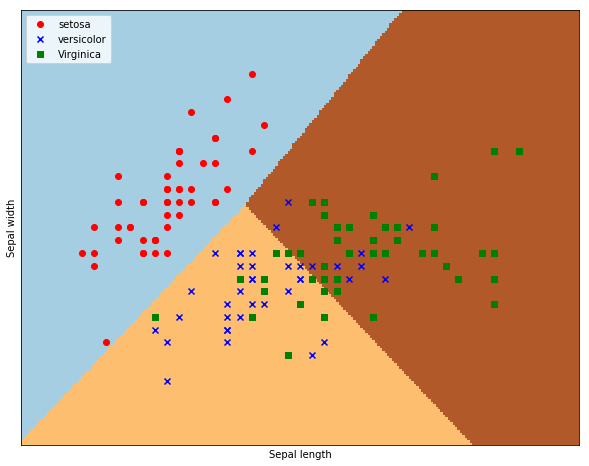

In [55]:
#meshgrid函数生成两个网格矩阵  
h = .02  
x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5  
y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  
'''
获取的鸢尾花两列数据，对应为花萼长度和花萼宽度，每个点的坐标就是 (x,y) 。 
先取 X 二维数组的第一列（长度）的最小值、最大值和步长 h （设置为 0.02 ）生成数组，
再取 X 二维数组的第二列（宽度）的最小值、最大值和步长 h 生成数组， 
最后用 meshgrid 函数生成两个网格矩阵 xx 和 yy
'''
#调用ravel()函数将xx和yy的两个矩阵转变成一维数组，由于两个矩阵大小相等，因此两个一维数组大小也相等。
#np.c_[xx.ravel(), yy.ravel()]是获取矩阵，即：
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()]) 
'''
总结：上述操作是把第一列花萼长度数据按h取等分作为行，并复制多行得到xx网格矩阵；再把第二列花萼宽度数据按h取等分，
作为列，并复制多列得到yy网格矩阵；最后将xx和yy矩阵都变成两个一维数组，调用np.c_[]函数组合成一个二维数组进行预测。
'''
Z = Z.reshape(xx.shape)#调用reshape()函数修改形状，将其Z转换为两个特征（长度和宽度），则39501个数据转换为171*231的矩阵
#注意39501个数据由xx, yy的矩阵个数生成
plt.figure(2, figsize=(10,8))  
#调用pcolormesh()函数将xx、yy两个网格矩阵和对应的预测结果Z绘制在图片上，可以发现输出为三个颜色区块，分布表示分类的三类区域。
#cmap=plt.cm.Paired表示绘图样式选择Paired主题
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)  

#绘制散点图  
plt.scatter(data[:50,0], data[:50,1], color='red',marker='o', label='setosa')  
plt.scatter(data[50:100,0], data[50:100,1], color='blue', marker='x', label='versicolor')  
plt.scatter(data[100:,0], data[100:,1], color='green', marker='s', label='Virginica')   
  
plt.xlabel('Sepal length')  
plt.ylabel('Sepal width')  
plt.xlim(xx.min(), xx.max())  
plt.ylim(yy.min(), yy.max())  
plt.xticks(())  
plt.yticks(())  
plt.legend(loc=2)   
plt.show()  

# H10 对鸢尾花数据进行K-means聚类，绘制聚类中心为3的聚类结果图

##### 算法介绍：k-means 算法是一种基于划分的聚类算法，它以 k 为参数，把 n 个数据对象分成 k 个簇，使簇内具有较高的相似度，而簇间的相似度较低。首先，随机地选择 k 个数据对象，每个数据对象代表一个簇中心，即选择 k 个初始中心；对剩余的每个对象，根据其与各簇中心的相似度（距离），将它赋给与其最相似的簇中心对应的簇；然后重新计算每个簇中所有对象的平均值，作为新的簇中心。


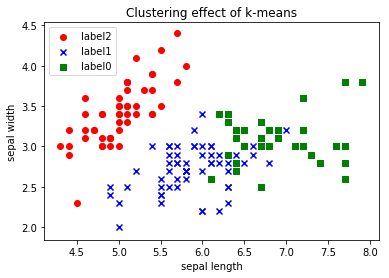

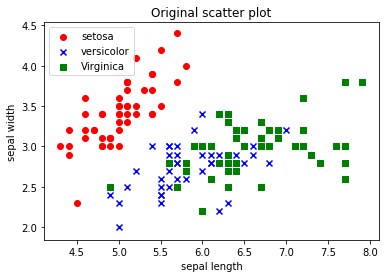

In [69]:
from sklearn.cluster import KMeans #导入K-means聚类模型
from sklearn.datasets import load_iris   #导入数据集iris
iris = load_iris()
X = iris.data[:,:] 

estimator = KMeans(n_clusters=3)#构造聚类器
estimator.fit(X)#聚类
label_pred = estimator.labels_ #获取聚类标签

#绘制k-means结果

x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.title('Clustering effect of k-means')   #标题
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label2')
plt.scatter(x1[:, 0], x1[:, 1], c = "blue", marker='x', label='label1')
plt.scatter(x2[:, 0], x2[:, 1], c = "green", marker='s', label='label0')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc=2)#标签位置
plt.show()

#绘制散点图  
plt.scatter(data[:50,0], data[:50,1], color='red',marker='o', label='setosa')  
plt.scatter(data[50:100,0], data[50:100,1], color='blue', marker='x', label='versicolor')  
plt.scatter(data[100:,0], data[100:,1], color='green', marker='s', label='Virginica')   
plt.title('Original scatter plot')   #标题
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc=2)#标签位置
plt.show()

# 对于matplotliib的使用--Matplotlib 是Python中类似 MATLAB 的绘图工具
#### 通常情况下，我们可以将一副Matplotlib图像分成三层结构：
###### .第一层是底层的容器层，主要包括Canvas、Figure、Axes；
###### .第二层是辅助显示层，主要包括Axis、Spines、Tick、Grid、Legend、Title等，该层可通过set_axis_off()或set_frame_on(False)等方法设置不显示；
###### .第三层为图像层，即通过plot、contour、scatter等方法绘制的图像。
1. 在任何绘图之前，我们需要一个Figure对象，可以理解成我们需要一张画板才能开始绘图。
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (2,2))  
figsize用于设定尺寸
2. 在拥有Figure对象之后，在作画前我们还需要轴，没有轴的话就没有绘图基准，所以需要添加Axes
ax = fig.add_subplot(111)
对于上面的fig.add_subplot(111)就是添加Axes的，参数的解释的在画板的第1行第1列的第一个位置生成一个Axes对象来准备作画。也可以通过fig.add_subplot(2, 2, 1)的方式生成Axes，前面两个参数确定了面板的划分，例如 2， 2会将整个面板划分成 2 * 2 的方格，
第三个参数取值范围是 [1, 2*2]表示第几个Axes。
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes',
     ylabel='Y-Axis', xlabel='X-Axis') 用于设置坐标尺度标题坐标轴名称
3. Multiple Axes直接生成网格画布，可以一次性生成所有的 Axes 
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

## 基本绘图2D
### 折线图
*  线 plot()函数画出一系列的点，并且用线将它们连接起来。
x = np.linspace(0, np.pi)
y_sin = np.sin(x)
y_cos = np.cos(x)
ax1.plot(x, y_sin)
ax2.plot(x, y_sin, 'go--', linewidth=2, markersize=12)
ax3.plot(x, y_cos, color='red', marker='+', linestyle='dashed')
* 通过关键字参数的方式绘图
举例：
1 ax.plot('x', 'mean', color='black', data=data_obj)
2 填充两条线之间的颜色
x = np.linspace(0, 10, 200)
data_obj = {'x': x,
            'y1': 2 * x + 1,
            'y2': 3 * x + 1.2,
            'mean': 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1}
ax.fill_between('x', 'y1', 'y2', color='yellow', data=data_obj)

### 散点图
* 只画点，但是不用线连接起来。
x = np.arange(10)
y = np.random.randn(10)
plt.scatter(x, y, color='red', marker='+')
plt.show()

### 条形图
* matplotlib库的axiss模块中的Axes.barh()函数用于制作水平条形图。
Axes.barh(self, y, width, height=0.8, left=None, *, align=’center’, **kwargs)

* 在水平或者垂直方向上画线
axes[0].axhline(0, color='gray', linewidth=2)
axes[1].axvline(0, color='gray', linewidth=2)

绘制条形图例子：
np.random.seed(1)
x = np.arange(5)
y = np.random.randn(5)

fig, axes = plt.subplots(ncols=2, figsize=plt.figaspect(1./2))
vert_bars = axes[0].bar(x, y, color='lightblue', align='center')#竖直
horiz_bars = axes[1].barh(x, y, color='lightblue', align='center')#水平
plt.show()

### 直方图
* 直方图用于统计数据出现的次数或者频率，有多种参数可以调整
* Axes.hist(self, x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)用于绘制直方图

直方图举例：
np.random.seed(19680801)
n_bins = 10
x = np.random.randn(1000, 3)
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()
colors = ['red', 'tan', 'lime']

ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='barstacked')
ax1.set_title('stacked bar')

ax2.hist(x,  histtype='barstacked', rwidth=0.9)

ax3.hist(x[:, 0], rwidth=0.9)
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()
参数中density控制Y轴是概率还是数量。histtype控制着直方图的样式，默认是 ‘bar’，对于多个条形时就相邻的方式呈现‘barstacked’ 就是叠在一起rwidth 控制着宽度，这样可以空出一些间隙

### 饼图
* pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=0, 0, frame=False, rotatelabels=False, *, normalize=None, data=None) 用于绘制饼图
例子：
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, (ax1, ax2) = plt.subplots(2)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax2.pie(sizes, autopct='%1.2f%%', shadow=True, startangle=90, explode=explode,
    pctdistance=1.12)
ax2.axis('equal')
ax2.legend(labels=labels, loc='upper right')

plt.show()
饼图自动根据数据的百分比画饼.labels是各个块的标签。autopct=%1.1f%%表示格式化百分比精确输出，explode，突出某些块，不同的值突出的效果不一样。pctdistance=1.12百分比距离圆心的距离，默认是0.6. 

### 箱形图
* boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)用于绘制箱线图
举例：
fig, (ax1, ax2) = plt.subplots(2)
data=np.random.randn(10, 3)
print(data)
data2=np.random.randn(15, 3)
ax1.boxplot(data)
ax2.boxplot(data2, vert=False) #控制方向
vert=False代表水平方向，否则为竖直方向

### 等高线（轮廓图）
* 需要描绘边界的时候，就会用到轮廓图，机器学习用的决策边界也常用轮廓图来绘画
* .contourf(*args, data=None, **kwargs) 用于绘制等高线

例子：
fig, (ax1, ax2) = plt.subplots(2)
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
ax1.contourf(x, y, z)
ax2.contour(x, y, z)
上面画了两个一样的轮廓图，contourf会填充轮廓线之间的颜色。数据x, y, z通常是具有相同形状的二维矩阵。x, y 可以为一维向量，但是必需有 z.shape = (y.n, x.n) ，这里 y.n 和 x.n 分别表示x、y的长度。Z通常表示的是距离X-Y平面的距离，传入X、Y则是控制了绘制等高线的范围。

## 布局、图例说明、边界等

### 3.1区间上下限
当绘画完成后，会发现X、Y轴的区间是会自动调整的，并不是跟我们传入的X、Y轴数据中的最值相同。为了调整区间我们使用下面的方式(任意选择一个)
* ax.set_xlim([xmin, xmax])   #设置X轴的区间
* ax.set_ylim([ymin, ymax])   #Y轴区间
* ax.axis([xmin, xmax, ymin, ymax])   #X、Y轴区间
* ax.set_ylim(bottom=-10)     #Y轴下限
* ax.set_xlim(right=25)       #X轴上限

### 3.2 图例说明
如果我们在一个Axes上做多次绘画，就需要添加图例说明
使用方法：
在绘图末尾添加标签：
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], label='Philadelphia')
ax.set(ylabel='Temperature (deg C)', xlabel='Time', title='A tale of two cities')
然后使用ax.legend()显示图例说明，对于 legend 还是传入参数，控制图例说明显示的位置
ax.legend()
Location String
Location Code
‘best’
0
‘upper right’
1
‘upper left’
2
‘lower left’
3
‘lower right’
4
‘right’
5
‘center left’
6
‘center right’
7
‘lower center’
8
‘upper center’
9
‘center’
10

### 3.3 区间分段
默认情况下，绘图结束之后，Axes 会自动的控制区间的分段
例子：
data = [('apples', 2), ('oranges', 3), ('peaches', 1)]
fruit, value = zip(*data)

fig, (ax1, ax2) = plt.subplots(2)
x = np.arange(len(fruit))
ax1.bar(x, value, align='center', color='gray')
ax2.bar(x, value, align='center', color='gray')

ax2.set(xticks=x, xticklabels=fruit)

#ax.tick_params(axis='y', direction='inout', length=10) #修改 ticks 的方向以及长度
plt.show()
上面不仅修改了X轴的区间段，并且修改了显示的信息为文本。 

### 3.4 布局
当我们绘画多个子图时，就会有一些美观的问题存在，例如子图之间的间隔，子图与画板的外边间距以及子图的内边距，下面说明这个问题：
fig, axes = plt.subplots(2, 2, figsize=(9, 9))
fig.subplots_adjust(wspace=0.5, hspace=0.3,
                    left=0.125, right=0.9,
                    top=0.9,    bottom=0.1)

#fig.tight_layout() #自动调整布局，使标题之间不重叠
plt.show()
通过fig.subplots_adjust()我们修改了子图水平之间的间隔wspace=0.5，垂直方向上的间距hspace=0.3，左边距left=0.125 等等，这里数值都是百分比的。以 [0, 1] 为区间，选择left、right、bottom、top 注意 top 和 right 是 0.9 表示上、右边距为百分之10。不确定如果调整的时候，fig.tight_layout()是一个很好的选择。之前说到了内边距，内边距是子图的，也就是 Axes 对象，所以这样使用 ax.margins(x=0.1, y=0.1)，当值传入一个值时，表示同时修改水平和垂直方向的内边距。

### 3.5 轴相关
改变边界的位置，去掉四周的边框：
fig, ax = plt.subplots()
ax.plot([-2, 2, 3, 4], [-10, 20, 25, 5])
ax.spines['top'].set_visible(False)     #顶边界不可见
ax.xaxis.set_ticks_position('bottom')  # ticks 的位置为下方，分上下的。
ax.spines['right'].set_visible(False)   #右边界不可见
ax.yaxis.set_ticks_position('left')  

###### "outward"
###### 移动左、下边界离 Axes 10 个距离
#ax.spines['bottom'].set_position(('outward', 10))
#ax.spines['left'].set_position(('outward', 10))

###### "data"
###### 移动左、下边界到 (0, 0) 处相交
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

###### "axes"
###### 移动边界，按 Axes 的百分比位置
#ax.spines['bottom'].set_position(('axes', 0.75))
#ax.spines['left'].set_position(('axes', 0.3))

plt.show()


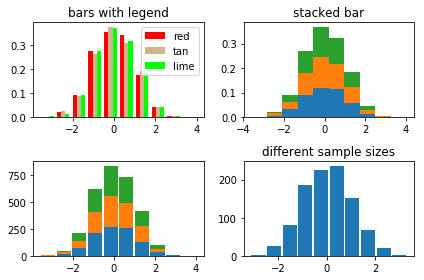

In [155]:
np.random.seed(19680801)
n_bins = 10
x = np.random.randn(1000, 3)
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()
colors = ['red', 'tan', 'lime']

ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='barstacked')
ax1.set_title('stacked bar')

ax2.hist(x,  histtype='barstacked', rwidth=0.9)

ax3.hist(x[:, 0], rwidth=0.9)
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

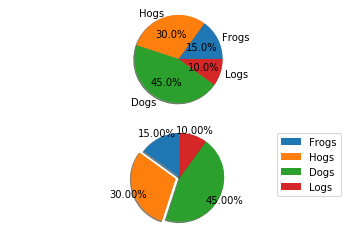

In [156]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, (ax1, ax2) = plt.subplots(2)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax2.pie(sizes, autopct='%1.2f%%', shadow=True, startangle=90, explode=explode,
    pctdistance=1.12)
ax2.axis('equal')
ax2.legend(labels=labels, loc='upper right')

plt.show()

[[ 0.67606989 -0.07077637  2.76819983]
 [-1.83551064 -0.99122578 -0.62665501]
 [ 0.37285224  3.04667003  0.27852455]
 [-1.59545147 -0.29497074  1.05193376]
 [ 0.99578982 -0.78350361 -0.53517953]
 [ 0.74416139  0.60888324 -0.07104341]
 [ 0.19452927 -1.5318152   1.62642772]
 [ 1.61762795 -0.23219886  0.76661464]
 [ 0.30033083 -0.62807054 -1.13455184]
 [-1.53031199  1.84276822  0.82588977]]


{'whiskers': [<matplotlib.lines.Line2D at 0x1d2f6a77c50>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2f6d00400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2f6a77b00>,
 'medians': [<matplotlib.lines.Line2D at 0x1d2f6d00c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d2f6d090b8>,
 'means': []}

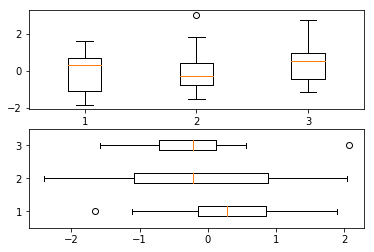

In [162]:
fig, (ax1, ax2) = plt.subplots(2)
data=np.random.randn(10, 3)
print(data)
data2=np.random.randn(15, 3)
ax1.boxplot(data)
ax2.boxplot(data2, vert=False) #控制方向

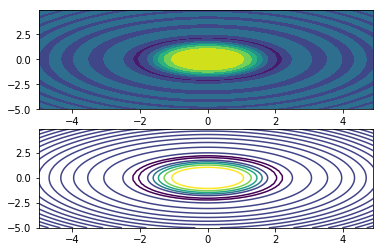

In [163]:
fig, (ax1, ax2) = plt.subplots(2)
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
ax1.contourf(x, y, z)
ax2.contour(x, y, z)

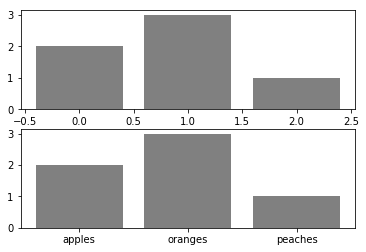

In [164]:
data = [('apples', 2), ('oranges', 3), ('peaches', 1)]
fruit, value = zip(*data)

fig, (ax1, ax2) = plt.subplots(2)
x = np.arange(len(fruit))
ax1.bar(x, value, align='center', color='gray')
ax2.bar(x, value, align='center', color='gray')

ax2.set(xticks=x, xticklabels=fruit)

#ax.tick_params(axis='y', direction='inout', length=10) #修改 ticks 的方向以及长度
plt.show()

# 不同聚类数量对于结果的区别

### 对鸢尾花数据进行K-means聚类，绘制聚类中心为4的聚类结果图

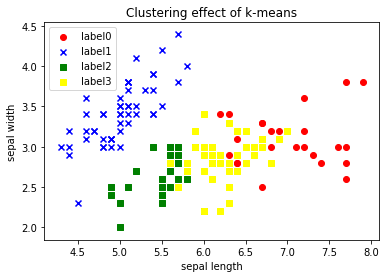

In [80]:
from sklearn.cluster import KMeans #导入K-means聚类模型
from sklearn.datasets import load_iris   #导入数据集iris
iris = load_iris()
X = iris.data[:] ##表示我们只取特征空间中的后两个维度

estimator = KMeans(n_clusters=4)#构造聚类器
estimator.fit(X)#聚类
label_pred = estimator.labels_ #获取聚类标签

#绘制k-means结果

x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
x3 = X[label_pred == 3]

plt.title('Clustering effect of k-means')   #标题
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "blue", marker='x', label='label1')
plt.scatter(x2[:, 0], x2[:, 1], c = "green", marker='s', label='label2')
plt.scatter(x3[:, 0], x3[:, 1], c = "yellow", marker='s', label='label3')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc=2)#标签位置
plt.show()


### 对鸢尾花数据进行K-means聚类，绘制聚类中心为2的聚类结果图

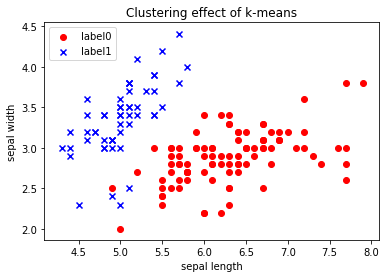

In [81]:
from sklearn.cluster import KMeans #导入K-means聚类模型
from sklearn.datasets import load_iris   #导入数据集iris
iris = load_iris()
X = iris.data[:] ##表示我们只取特征空间中的后两个维度

estimator = KMeans(n_clusters=2)#构造聚类器
estimator.fit(X)#聚类
label_pred = estimator.labels_ #获取聚类标签

#绘制k-means结果

x0 = X[label_pred == 0]
x1 = X[label_pred == 1]


plt.title('Clustering effect of k-means')   #标题
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "blue", marker='x', label='label1')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc=2)#标签位置
plt.show()


## 使用不同的特征进行聚类

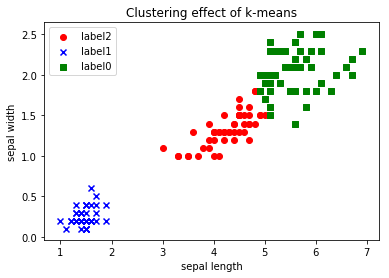

In [83]:
from sklearn.cluster import KMeans #导入K-means聚类模型
from sklearn.datasets import load_iris   #导入数据集iris
iris = load_iris()
X = iris.data[:,2:] 

estimator = KMeans(n_clusters=3)#构造聚类器
estimator.fit(X)#聚类
label_pred = estimator.labels_ #获取聚类标签

#绘制k-means结果

x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
plt.title('Clustering effect of k-means')   #标题
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label2')
plt.scatter(x1[:, 0], x1[:, 1], c = "blue", marker='x', label='label1')
plt.scatter(x2[:, 0], x2[:, 1], c = "green", marker='s', label='label0')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(loc=2)#标签位置
plt.show()


## 尝试更多的数据集

In [84]:
diabetes_X = diabetes.data[:, 2]  #第三列 Body mass index
print(diabetes_X.shape)
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-10]
diabetes_X_test = diabetes_X[-10:]
diabetes_y_train = diabetes.target[:-10]
diabetes_y_test = diabetes.target[-10:]
#绘制测试集的散点图
#回归训练及预测
diabetes_X_train=np.array(diabetes_X_train).reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)
print(regr)
#系数 残差平法和 方差得分
diabetes_X_test=np.array(diabetes_X_test).reshape(-1,1)
print ('Coefficients :\n', regr.coef_)
print ("Residual sum of square: %.2f" %np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
print ("variance score: %.2f" % regr.score(diabetes_X_test, diabetes_y_test))

(442,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Coefficients :
 [941.79757086]
Residual sum of square: 2118.60
variance score: 0.40


## 模型评估指标

模型效果指标评估

    y_true：真实的数据值

    y_pred：回归模型预测的数据值

    explained_variance_score：解释回归模型的方差得分，其值取值范围是[0,1]，越接近于1说明自变量越能解释因变量

    的方差变化，值越小则说明效果越差。

    mean_absolute_error：平均绝对误差（Mean Absolute Error，MAE），用于评估预测结果和真实数据集的接近程度的程度

    ，其其值越小说明拟合效果越好。

    mean_squared_error：均方差（Mean squared error，MSE），该指标计算的是拟合数据和原始数据对应样本点的误差的

    平方和的均值，其值越小说明拟合效果越好。

    r2_score：判定系数，其含义是也是解释回归模型的方差得分，其值取值范围是[0,1]，越接近于1说明自变量越能解释因

    变量的方差变化，值越小则说明效果越差。

# 通过均方差评估下不同参数下回归模型的能力

# 进行2007年前中国男足在亚洲水平的聚类实验

In [199]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans #导入K-means聚类模型
feature_train = [[1,1,0.5],
[0.3 ,0 ,0.19],
[0 ,0.15 ,0.13],
[0.24, 0.76 ,0.25],
[0.3, 0.76 ,0.06],
[1 ,1, 0],
[1, 0.76 ,0.5],
[1 ,0.76, 0.5],
[0.7 ,0.76, 0.25],
[1, 1, 0.5],
[1, 1, 0.25],
[1, 1, 0.5],
[0.7, 0.76, 0.5],
[0.7, 0.68, 1],
[1 ,1, 0.5]]
X = feature_train[:] 
#data = pd.DataFrame(X,index=[])
print([X[1],X[12],X[9]])
init = np.vstack([X[1],X[12],X[9]])  #日本 巴林 泰国 1 12 9
china = KMeans(n_clusters=3,init=init)#构造聚类器
china.fit(X)#聚类
y_p = china.predict(X)
center = china.cluster_centers_
print (center)
#result = pd.concat(X,y_p)
print(y_p)

[[0.3, 0, 0.19], [0.7, 0.76, 0.5], [1, 1, 0.5]]
[[0.15    0.075   0.16   ]
 [0.528   0.744   0.412  ]
 [1.      0.94    0.40625]]
[2 0 0 1 1 2 2 2 1 2 2 2 1 1 2]


D:\Anaconda5.2.0\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [26]:
from matplotlib import pyplot  
import scipy as sp  
import numpy as np  
from sklearn import svm  
import matplotlib.pyplot as plt  
from sklearn.cluster   import KMeans  
from scipy import sparse  
import pandas as pd
# 数据读入
data = np.loadtxt(r'C:\Users\27675\Desktop\football.txt')  
print (data)
X_train = data[:,:]
#pyplot.imshow(X_train, interpolation='nearest')  
print(X_train[1], X_train[12] ,X_train[9])
init = np.vstack([ X_train[1], X_train[12] ,X_train[9]])
kmeans = KMeans(n_clusters=3,init=init)
kmeans.fit(X_train)
y_pre = kmeans.predict(X_train)
center = kmeans.cluster_centers_ #获取中心点
print('三组聚类中心分别为：')
print(center)
print(pd.concat((pd.DataFrame(X_train,index=list(['中国','日本','韩国','伊朗','沙特','伊拉克','卡塔尔','阿联酋','乌兹别克斯坦','泰国','越南','阿曼','巴林','朝鲜','印尼']),columns=list(["2006 世界杯","2010 世界杯","2007 亚洲杯"])),pd.DataFrame(y_pre,index=list(['中国','日本','韩国','伊朗','沙特','伊拉克','卡塔尔','阿联酋','乌兹别克斯坦','泰国','越南','阿曼','巴林','朝鲜','印尼']),columns=list(["类别"]))),axis=1))

[[1.   1.   0.5 ]
 [0.3  0.   0.19]
 [0.   0.15 0.13]
 [0.24 0.76 0.25]
 [0.3  0.76 0.06]
 [1.   1.   0.  ]
 [1.   0.76 0.5 ]
 [1.   0.76 0.5 ]
 [0.7  0.76 0.25]
 [1.   1.   0.5 ]
 [1.   1.   0.25]
 [1.   1.   0.5 ]
 [0.7  0.76 0.5 ]
 [0.7  0.68 1.  ]
 [1.   1.   0.5 ]]
[0.3  0.   0.19] [0.7  0.76 0.5 ] [1.  1.  0.5]
三组聚类中心分别为：
[[0.15    0.075   0.16   ]
 [0.528   0.744   0.412  ]
 [1.      0.94    0.40625]]
        2006 世界杯  2010 世界杯  2007 亚洲杯  类别
中国          1.00      1.00      0.50   2
日本          0.30      0.00      0.19   0
韩国          0.00      0.15      0.13   0
伊朗          0.24      0.76      0.25   1
沙特          0.30      0.76      0.06   1
伊拉克         1.00      1.00      0.00   2
卡塔尔         1.00      0.76      0.50   2
阿联酋         1.00      0.76      0.50   2
乌兹别克斯坦      0.70      0.76      0.25   1
泰国          1.00      1.00      0.50   2
越南          1.00      1.00      0.25   2
阿曼          1.00      1.00      0.50   2
巴林          0.70      0.76      0.50   1
朝鲜          0.

D:\Anaconda5.2.0\lib\site-packages\sklearn\cluster\k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
